# Wine Quality Prediction

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Dataset

In [2]:
dataset = pd.read_csv('WineQT.csv')

## 3. Basic Info

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

1. Fixed Acidity: Fixed acidity in wine refers to the total concentration of non-volatile acids, such as tartaric, malic, and lactic acids. It contributes to the wine's taste, structure, and stability. The presence of fixed acidity provides a refreshing tartness and helps in balancing the wine's flavor profile, making it an important component for overall taste and aging potential.

2. Volatile Acidity: Volatile acidity in wine refers to the concentration of acids that can vaporize, such as acetic acid. While small amounts of volatile acidity can contribute to the wine's complexity, excessive levels can lead to undesirable vinegar-like aromas and flavors. Controlling volatile acidity is crucial in maintaining the wine's quality and preventing off-flavors.

3. Citric Acid: Citric acid is a natural acid found in wine, often originating from the grapes themselves. It can contribute to the wine's freshness and fruitiness, enhancing its overall flavor profile. However, excessive levels of citric acid can lead to a sour or overly acidic taste, so its presence must be balanced to ensure a harmonious wine.

4. Residual Sugar: Residual sugar refers to the natural sugars remaining in the wine after fermentation. It can contribute to the wine's sweetness, body, and mouthfeel. Wines with higher residual sugar levels tend to have a sweeter taste, while those with lower levels are drier. The presence of residual sugar is important in defining the wine's style and can influence its pairing with food.

5. Chlorides: Chlorides in wine, originating from the soil and winemaking process, can impact the wine's taste and stability. While small amounts of chlorides can contribute to the wine's complexity, excessive levels can lead to a salty or briny taste, negatively affecting the overall flavor profile.

6. Free Sulfur Dioxide: Free sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage. It plays a crucial role in maintaining the wine's freshness, stability, and aging potential. Proper levels of free sulfur dioxide are essential for ensuring the wine's longevity and quality.

7. Total Sulfur Dioxide: Total sulfur dioxide encompasses both the free and bound forms of sulfur dioxide in wine. It serves as a preservative and antioxidant, protecting the wine from spoilage and oxidation. Monitoring total sulfur dioxide levels is important for ensuring the wine's shelf life and overall quality.

8. Density: Density in wine is a measure of its mass per unit volume and can provide insights into the wine's alcohol content and potential sweetness. It contributes to the wine's body and mouthfeel, with higher density wines often exhibiting a richer and more viscous texture.

9. pH: The pH level of wine influences its acidity, microbial stability, and color stability. It plays a crucial role in shaping the wine's overall taste and mouthfeel. Proper pH levels are important for ensuring the wine's balance and longevity.

10. Sulphates: Sulphates, often in the form of sulfur dioxide, are used in winemaking as a preservative and antimicrobial agent. They help prevent oxidation and microbial spoilage, contributing to the wine's stability and longevity. However, excessive levels of sulphates can lead to undesirable aromas and flavors, so their presence must be carefully managed.

11. Alcohol: The alcohol content of wine contributes to its body, texture, and overall flavor profile. It influences the wine's warmth, mouthfeel, and perceived sweetness. The alcohol level is an important factor in defining the wine's style and can impact its aging potential.

In [9]:
dataset.shape

(1143, 13)

## 4. Explratory Data Analysis (EDA)

<Axes: >

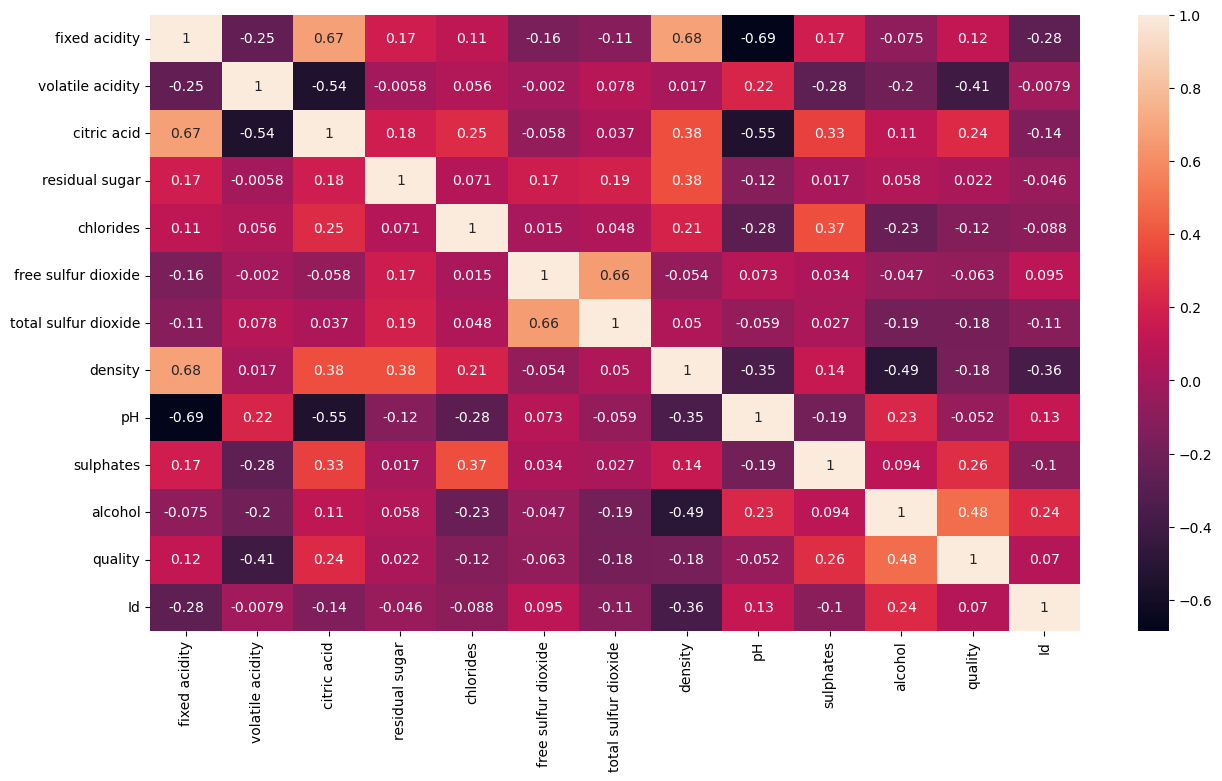

In [10]:
#Heatmap to show variance of a data
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True)

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

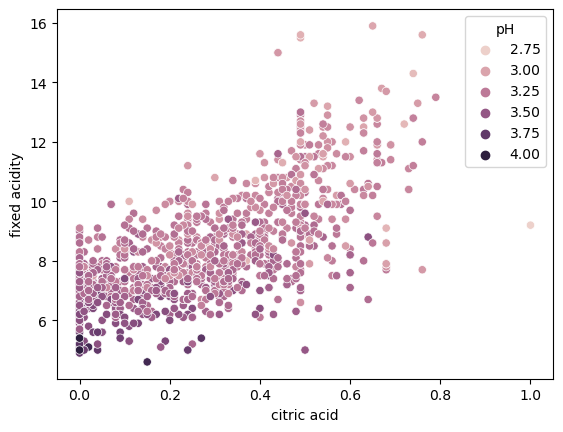

In [11]:
# fixed acidity vs citric acid
sns.scatterplot(data=dataset,y='fixed acidity',x='citric acid',hue='pH')

There is a postive correlation between them.
As the fixed acidity increased there will be more presence of citic acid.
If the fixed acidity of a solution, such as wine, is increased, it can lead to a more tart or sour taste.
with increase in fixed acidity pH value also decrease.
A decrease in pH value indicates an increase in the acidity of a solution.

<Axes: xlabel='fixed acidity', ylabel='density'>

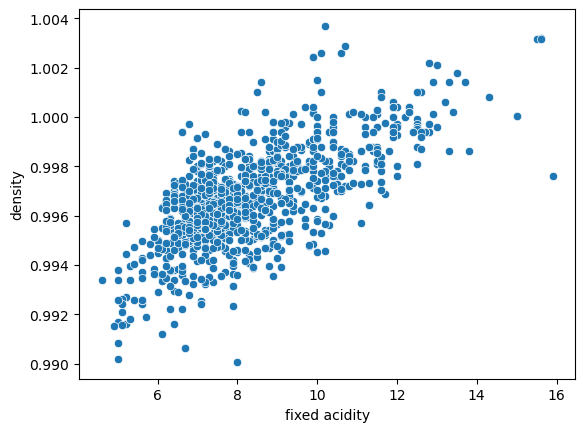

In [12]:
# fixed acidity vs density
sns.scatterplot(data=dataset,x='fixed acidity',y='density')

As the fixed acidity of wine increases, the density of the wine also tends to increase. This relationship is due to the presence of acids in the wine, which can contribute to its overall density.

<Axes: xlabel='pH', ylabel='fixed acidity'>

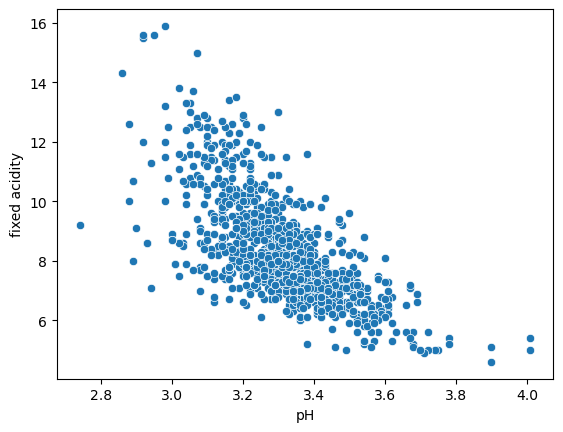

In [13]:
# fixed acidity vs pH
sns.scatterplot(data=dataset,y='fixed acidity',x='pH')

There is a negative correlation between them.
In wine, fixed acidity and pH are closely related. As fixed acidity increases, the pH of the wine tends to decrease, making the wine more acidic. Conversely, as fixed acidity decreases, the pH tends to increase, making the wine less acidic.

In [14]:
dataset['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

(array([  6.,   0.,  33.,   0., 483.,   0., 462.,   0., 143.,  16.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

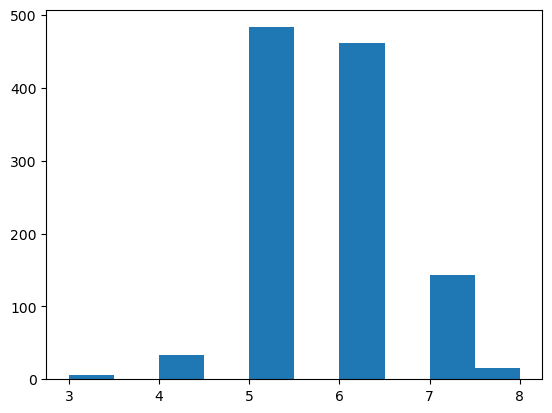

In [15]:
plt.hist(dataset['quality'])

In [16]:
#creating a function to get histplot for all columns
def create_histplot(dataset):
    for column in dataset.columns:
        median_value = np.median(dataset[column])
        print(f'{median_value} is median value for {column}.')
        sns.histplot(data=dataset, x= dataset[column]);
        plt.show()

7.9 is median value for fixed acidity.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


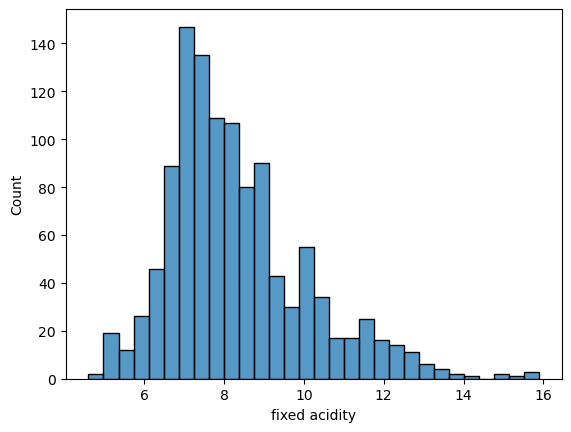

0.52 is median value for volatile acidity.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


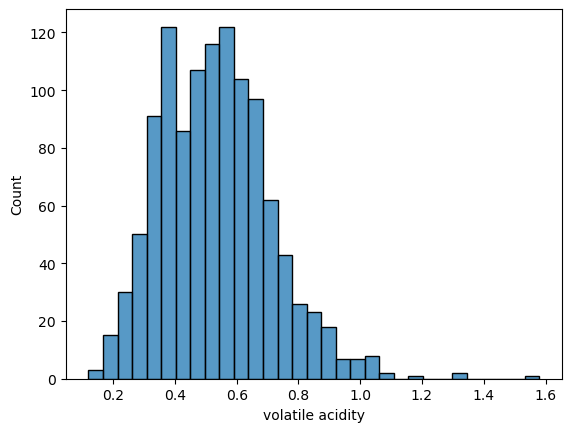

0.25 is median value for citric acid.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


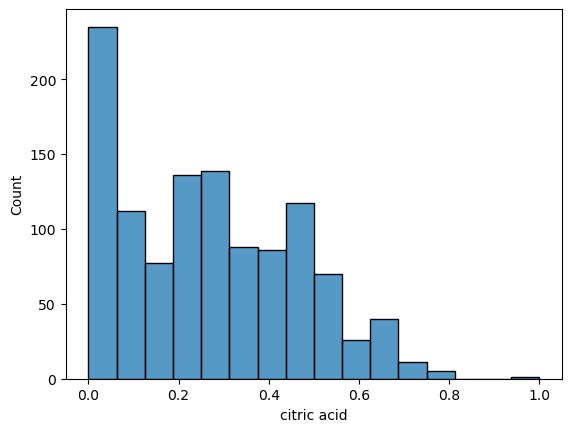

c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2.2 is median value for residual sugar.


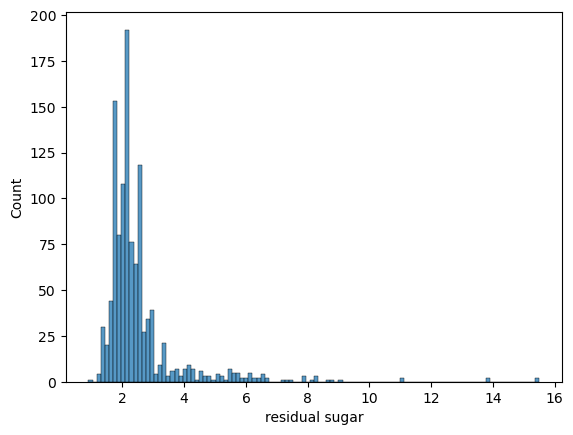

c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.079 is median value for chlorides.


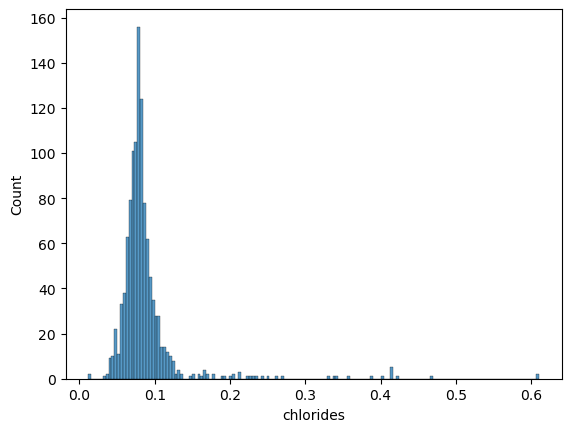

13.0 is median value for free sulfur dioxide.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


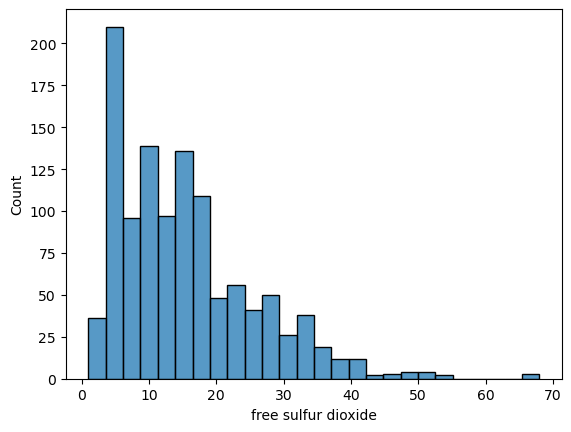

37.0 is median value for total sulfur dioxide.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


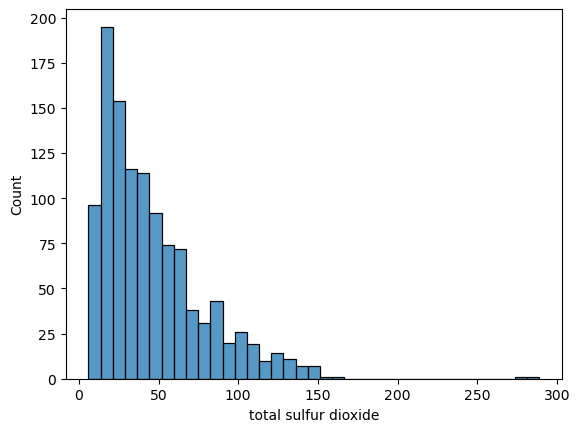

c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.99668 is median value for density.


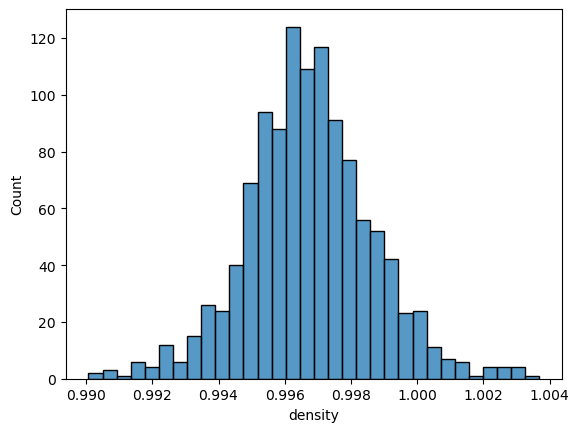

3.31 is median value for pH.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


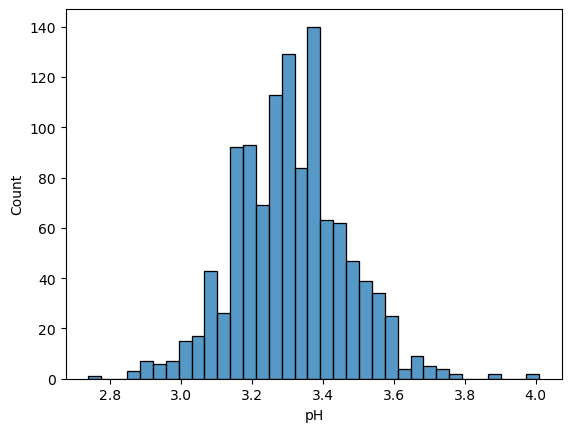

c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.62 is median value for sulphates.


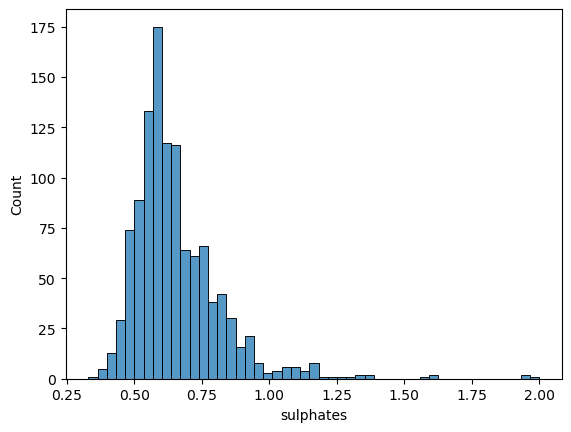

10.2 is median value for alcohol.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


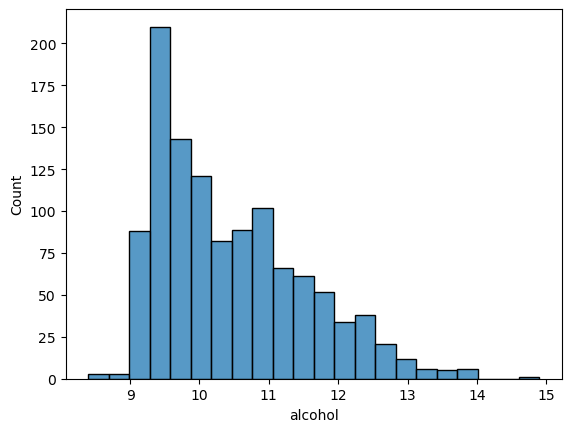

c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


6.0 is median value for quality.


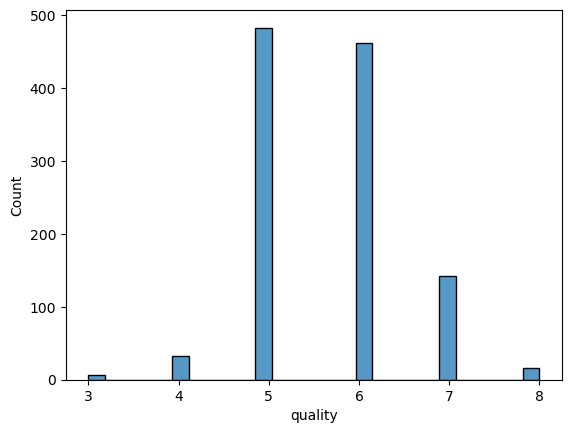

794.0 is median value for Id.


c:\Users\PROFESSOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


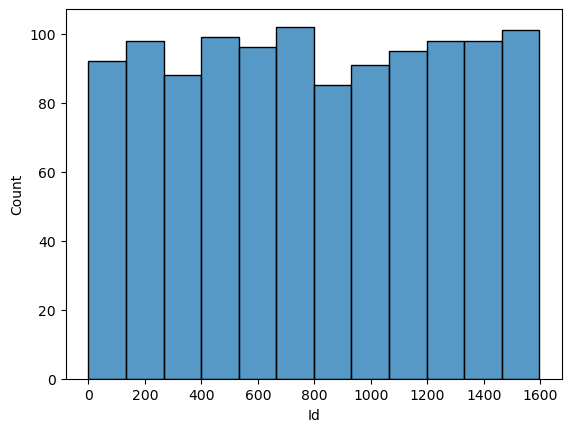

In [17]:
create_histplot(dataset)

- EDA Using use Y-Data Profilling


In [18]:
# pip install ydata-profiling


In [19]:
# from ydata_profiling import ProfileReport

# df = pd.read_csv('/content/drive/MyDrive/PC/Artificial Inteligence(ML,DL)/Projects + Assignments/Machine Learning/Wine Quality Prediction/WineQT.csv')
# profile = ProfileReport(df, title="Profiling Report")


## 5.Train Test Split

In [20]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [21]:
dataset.drop('Id',axis=1,inplace=True)

In [22]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [23]:
x = dataset.drop('quality',axis=1)

In [24]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [25]:
y = dataset['quality']

In [26]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## 6. Model Apply

### 6.1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression(solver='liblinear',penalty='l1')

In [30]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
model.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7,
       5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 7, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 7,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 5, 6], dtype=int64)

In [34]:
y_test

158     5
1081    6
291     5
538     6
367     6
       ..
66      4
328     6
67      5
231     6
966     6
Name: quality, Length: 229, dtype: int64

## 7. Accuracy Calculate

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_pred,y_test)

0.6462882096069869

## 8. Model Save

In [38]:
import pickle as pk
pk.dump(model,open('model.pkl','wb'))

In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
